<a href="https://colab.research.google.com/github/Paulsob/TelecomLabs/blob/main/Lab7_telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate
PI2 = 2 * np.pi
np.set_printoptions(precision=3, suppress=True)

Комплексный синусоид

In [3]:
from thinkdsp import Sinusoid

class ComplexSinusoid(Sinusoid):
    """Represents a complex exponential signal."""

    def evaluate(self, ts):
        """Evaluates the signal at the given times.

        ts: float array of times

        returns: float wave array
        """
        print(ts)
        phases = PI2 * self.freq * ts + self.offset
        print(phases)
        ys = self.amp * np.exp(1j * phases)
        return ys

In [4]:
signal = ComplexSinusoid(freq=1, amp=0.6, offset=1)
wave = signal.make_wave(duration=1, framerate=4)
print(wave.ys)

[0.   0.25 0.5  0.75]
[1.    2.571 4.142 5.712]
[ 0.324+0.505j -0.505+0.324j -0.324-0.505j  0.505-0.324j]


In [5]:
from thinkdsp import SumSignal

def synthesize1(amps, freqs, ts):
    components = [ComplexSinusoid(freq, amp)
                  for amp, freq in zip(amps, freqs)]
    signal = SumSignal(*components)
    ys = signal.evaluate(ts)
    return ys

In [6]:
amps = np.array([0.6, 0.25, 0.1, 0.05])
freqs = [100, 200, 300, 400]
framerate = 11025

ts = np.linspace(0, 1, framerate, endpoint=False)
ys = synthesize1(amps, freqs, ts)
print(ys)

[0. 0. 0. ... 1. 1. 1.]
[  0.      0.057   0.114 ... 628.148 628.205 628.262]
[0. 0. 0. ... 1. 1. 1.]
[   0.       0.114    0.228 ... 1256.295 1256.409 1256.523]
[0. 0. 0. ... 1. 1. 1.]
[   0.       0.171    0.342 ... 1884.443 1884.614 1884.785]
[0. 0. 0. ... 1. 1. 1.]
[   0.       0.228    0.456 ... 2512.59  2512.818 2513.046]
[1.   +0.j    0.995+0.091j 0.979+0.18j  ... 0.953-0.267j 0.979-0.18j
 0.995-0.091j]


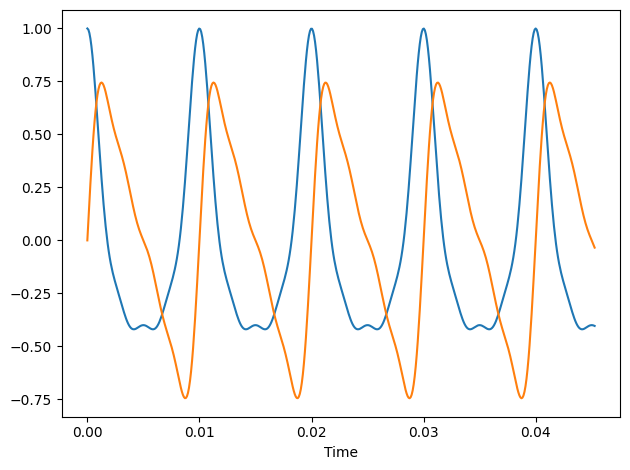

In [7]:
n = 500
plt.plot(ts[:n], ys[:n].real)
plt.plot(ts[:n], ys[:n].imag)
decorate(xlabel='Time')

In [8]:
from thinkdsp import Wave

wave = Wave(ys.real, framerate)
wave.apodize()
wave.make_audio()

In [9]:
wave = Wave(ys.imag, framerate)
wave.apodize()
wave.make_audio()

In [10]:
def synthesize2(amps, freqs, ts):
    args = np.outer(ts, freqs)
    M = np.exp(1j * PI2 * args)
    ys = np.dot(M, amps)
    return ys

In [11]:
amps = np.array([0.6, 0.25, 0.1, 0.05])
ys = synthesize2(amps, freqs, ts)
print(ys)

[1.   +0.j    0.995+0.091j 0.979+0.18j  ... 0.953-0.267j 0.979-0.18j
 0.995-0.091j]


In [12]:
wave = Wave(ys.real, framerate)
wave.apodize()
wave.make_audio()

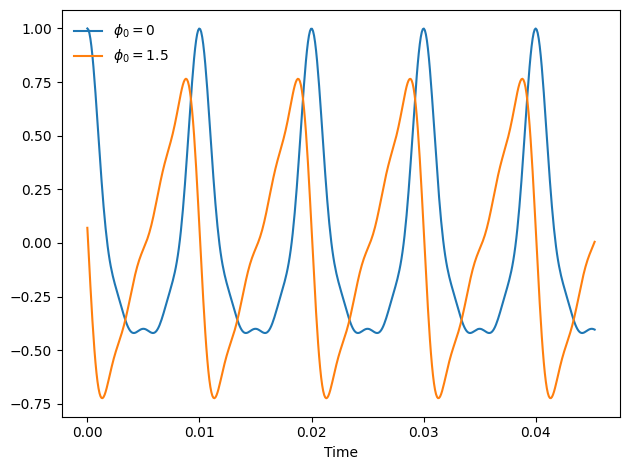

In [13]:
phi = 1.5
amps2 = amps * np.exp(1j * phi)
ys2 = synthesize2(amps2, freqs, ts)

n = 500
plt.plot(ts[:n], ys.real[:n], label=r'$\phi_0 = 0$')
plt.plot(ts[:n], ys2.real[:n], label=r'$\phi_0 = 1.5$')
decorate(xlabel='Time')

Анализ

In [14]:
def analyze1(ys, freqs, ts):
    args = np.outer(ts, freqs)
    M = np.exp(1j * PI2 * args)
    amps = np.linalg.solve(M, ys)
    return amps

In [15]:
n = len(freqs)
amps2 = analyze1(ys[:n], freqs, ts[:n])
print(amps2)

[0.6 -0.j 0.25+0.j 0.1 -0.j 0.05+0.j]


In [16]:
N = 4
ts = np.arange(N) / N
freqs = np.arange(N)
args = np.outer(ts, freqs)
M = np.exp(1j * PI2 * args)
print(M)

[[ 1.+0.j  1.+0.j  1.+0.j  1.+0.j]
 [ 1.+0.j  0.+1.j -1.+0.j -0.-1.j]
 [ 1.+0.j -1.+0.j  1.-0.j -1.+0.j]
 [ 1.+0.j -0.-1.j -1.+0.j  0.+1.j]]


In [17]:
MstarM = M.conj().transpose().dot(M)
print(MstarM.real)

[[ 4. -0.  0.  0.]
 [-0.  4. -0.  0.]
 [ 0. -0.  4. -0.]
 [ 0.  0. -0.  4.]]


In [18]:
def analyze2(ys, freqs, ts):
    args = np.outer(ts, freqs)
    M = np.exp(1j * PI2 * args)
    amps = M.conj().transpose().dot(ys) / N
    return amps

In [19]:
N = 4
amps = np.array([0.6, 0.25, 0.1, 0.05])
freqs = np.arange(N)
ts = np.arange(N) / N
ys = synthesize2(amps, freqs, ts)

amps3 = analyze2(ys, freqs, ts)
print(amps3)

[0.6 +0.j 0.25+0.j 0.1 -0.j 0.05-0.j]


In [20]:
def synthesis_matrix(N):
    ts = np.arange(N) / N
    freqs = np.arange(N)
    args = np.outer(ts, freqs)
    M = np.exp(1j * PI2 * args)
    return M

In [21]:
def dft(ys):
    N = len(ys)
    M = synthesis_matrix(N)
    amps = M.conj().transpose().dot(ys)
    return amps

In [22]:
print(dft(ys))

[2.4+0.j 1. +0.j 0.4-0.j 0.2-0.j]


In [23]:
print(np.fft.fft(ys))

[2.4+0.j 1. -0.j 0.4-0.j 0.2-0.j]


In [24]:
def idft(amps):
    N = len(amps)
    M = synthesis_matrix(N)
    ys = M.dot(amps) / N
    return ys

In [25]:
ys = idft(amps)
print(dft(ys))

[0.6 +0.j 0.25+0.j 0.1 -0.j 0.05-0.j]


Реальные сигналы

In [26]:
from thinkdsp import SawtoothSignal

framerate = 10000
signal = SawtoothSignal(freq=500)
wave = signal.make_wave(duration=0.1, framerate=framerate)
wave.make_audio()

In [27]:
hs = dft(wave.ys)
len(wave.ys), len(hs)

(1000, 1000)

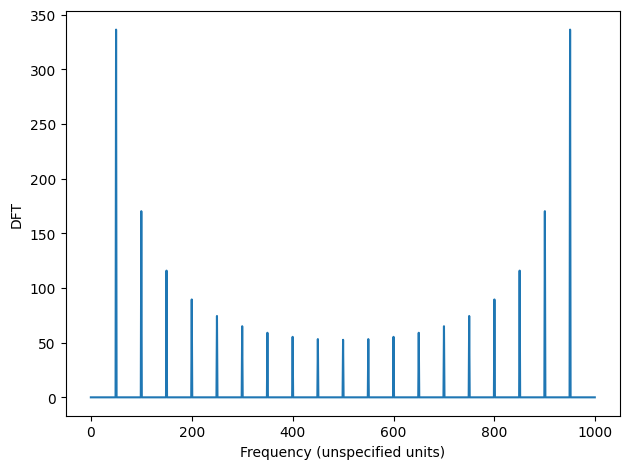

In [28]:
amps = np.abs(hs)
plt.plot(amps)
decorate(xlabel='Frequency (unspecified units)', ylabel='DFT')

In [29]:
N = len(hs)
fs = np.arange(N) * framerate / N

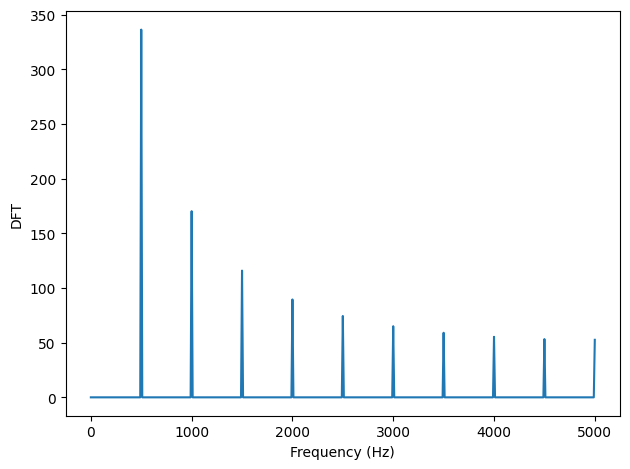

In [30]:
plt.plot(fs[:N//2+1], amps[:N//2+1])
decorate(xlabel='Frequency (Hz)', ylabel='DFT')

In [31]:
M = synthesis_matrix(N=8)

In [32]:
Mstar = M.conj().transpose()

In [33]:
from thinkdsp import TriangleSignal

wave = TriangleSignal(freq=1).make_wave(duration=1, framerate=8)
wave.ys

array([ 1. ,  0.5,  0. , -0.5, -1. , -0.5,  0. ,  0.5])

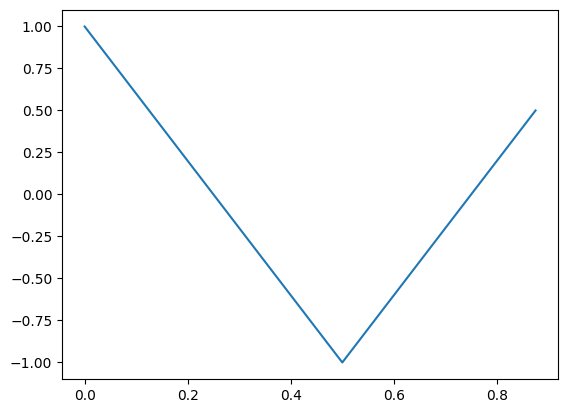

In [34]:
wave.plot()

In [35]:
row3 = Mstar[3, :]
print(row3)

[ 1.   -0.j    -0.707-0.707j -0.   +1.j     0.707-0.707j -1.   -0.j
  0.707+0.707j  0.   -1.j    -0.707+0.707j]


In [36]:
row5 = Mstar[5, :]
row5

array([ 1.   -0.j   , -0.707+0.707j,  0.   -1.j   ,  0.707+0.707j,
       -1.   -0.j   ,  0.707-0.707j, -0.   +1.j   , -0.707-0.707j])

In [37]:
def approx_equal(a, b, tol=1e-10):
    return np.sum(np.abs(a-b)) < tol

In [38]:
approx_equal(row3, row5.conj())

np.True_

In [39]:
X3 = row3.dot(wave.ys)
X3

np.complex128(0.5857864376269055-1.1102230246251565e-16j)

In [40]:
X5 = row5.dot(wave.ys)
X5

np.complex128(0.5857864376269062-5.551115123125783e-16j)

In [41]:
abs(X3 - X5)

np.float64(8.005932084973442e-16)

[0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875]
[0.    0.785 1.571 2.356 3.142 3.927 4.712 5.498]


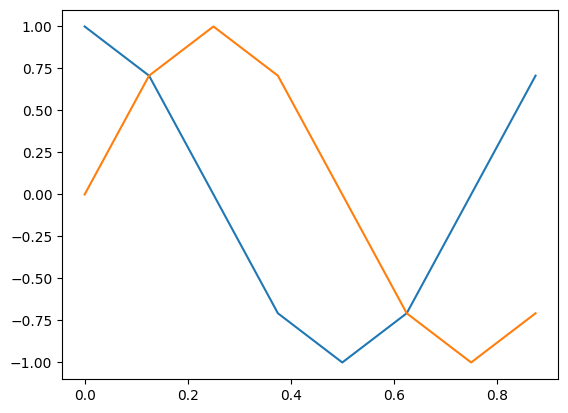

In [42]:
wave2 = ComplexSinusoid(freq=1).make_wave(duration=1, framerate=8)
plt.plot(wave2.ts, wave2.ys.real)
plt.plot(wave2.ts, wave2.ys.imag)

In [43]:
X3 = row3.dot(wave2.ys)
X3

np.complex128(1.4432899320127035e-15-2.7755575615628914e-16j)

In [44]:
X5 = row5.dot(wave2.ys)
X5

np.complex128(3.3306690738754696e-16j)

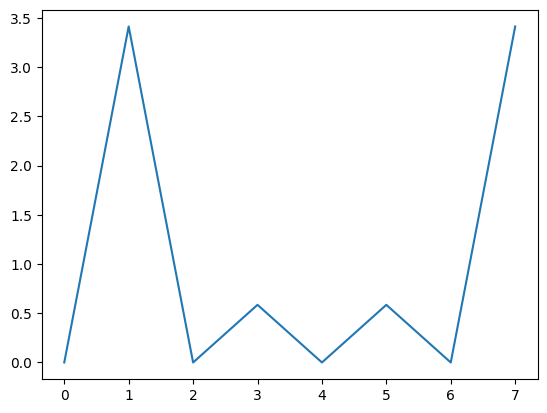

In [45]:
hs = np.fft.fft(wave.ys)
plt.plot(abs(hs))

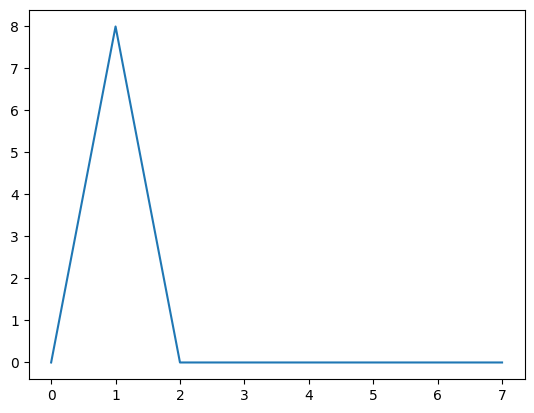

In [46]:
hs = np.fft.fft(wave2.ys)
plt.plot(abs(hs))

In [47]:
N = 8
ts = np.arange(N) / N
freqs = np.arange(N)
freqs = [0, 1, 2, 3, 4, -3, -2, -1]
args = np.outer(ts, freqs)
M2 = np.exp(1j * PI2 * args)

In [48]:
approx_equal(M, M2)

np.True_

In [49]:
framerate = 10000
signal = SawtoothSignal(freq=500)
wave = signal.make_wave(duration=0.1, framerate=framerate)

In [50]:
spectrum = wave.make_spectrum(full=True)

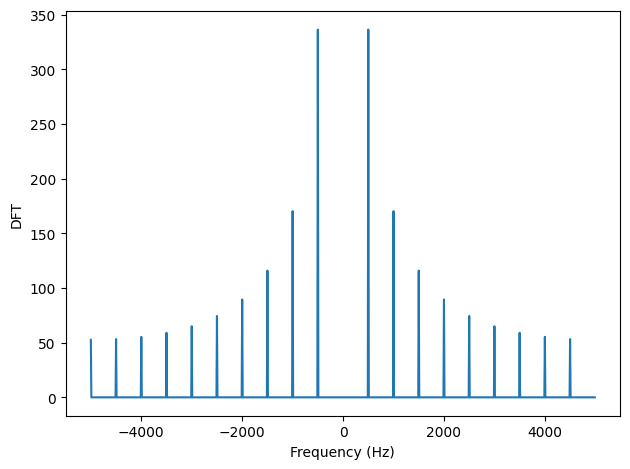

In [51]:
spectrum.plot()
decorate(xlabel='Frequency (Hz)', ylabel='DFT')

Пункт 2

In [52]:
ys = [-0.5, 0.1, 0.7, -0.1]
hs = np.fft.fft(ys)
print(hs)

[ 0.2+0.j  -1.2-0.2j  0.2+0.j  -1.2+0.2j]


In [53]:
def dft(ys):
    N = len(ys)
    ts = np.arange(N) / N
    freqs = np.arange(N)
    args = np.outer(ts, freqs)
    M = np.exp(1j * PI2 * args)
    amps = M.conj().transpose().dot(ys)
    return amps

In [54]:
hs2 = dft(ys)
np.sum(np.abs(hs - hs2))

np.float64(5.864775846765962e-16)

In [55]:
def fft_norec(ys):
    N = len(ys)
    He = np.fft.fft(ys[::2])
    Ho = np.fft.fft(ys[1::2])

    ns = np.arange(N)
    W = np.exp(-1j * PI2 * ns / N)

    return np.tile(He, 2) + W * np.tile(Ho, 2)

In [56]:

hs3 = fft_norec(ys)
np.sum(np.abs(hs - hs3))

np.float64(0.0)

In [57]:
def fft(ys):
    N = len(ys)
    if N == 1:
        return ys

    He = fft(ys[::2])
    Ho = fft(ys[1::2])

    ns = np.arange(N)
    W = np.exp(-1j * PI2 * ns / N)

    return np.tile(He, 2) + W * np.tile(Ho, 2)

In [58]:
hs4 = fft(ys)
np.sum(np.abs(hs - hs4))

np.float64(1.6653345369377348e-16)